In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [13]:
df=pd.read_csv("diabetes.csv")

In [14]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
(df==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

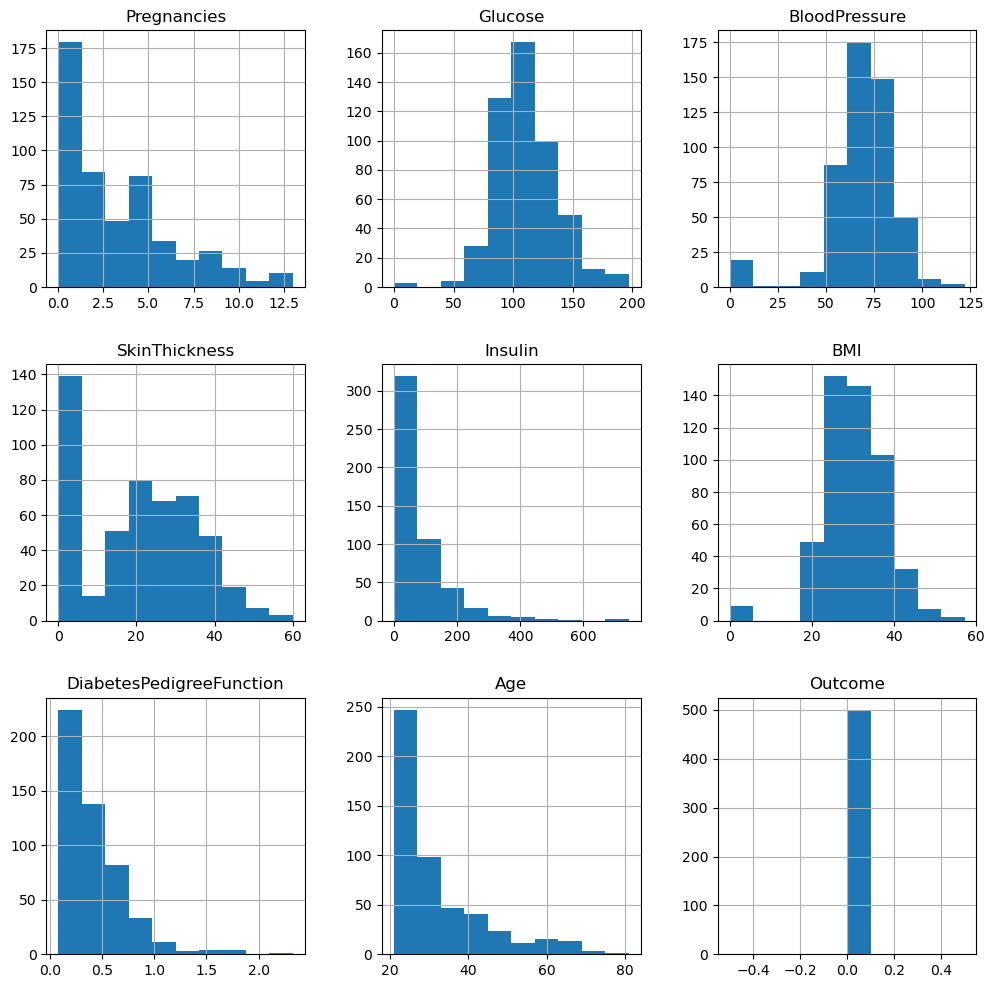

In [17]:
hist1=df[df['Outcome']==0].hist(figsize=(12,12))

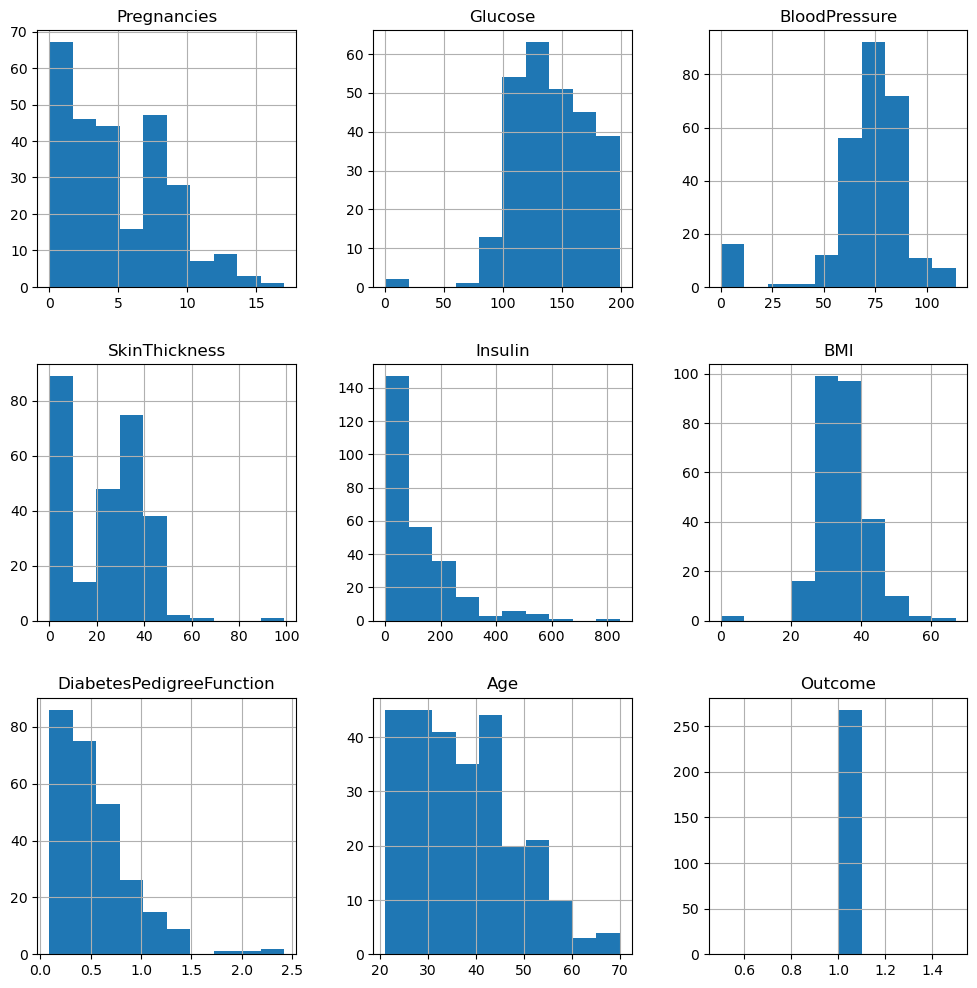

In [18]:
hist1=df[df['Outcome']==1].hist(figsize=(12,12))

# Before Preprocessing

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, target_names, title='Confusion Matrix', figsize=(5, 3)):
    """
    Plot a seaborn heatmap for the confusion matrix.
    
    Parameters:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        target_names (list): List of target class names.
        title (str): Title of the plot.
        figsize (tuple): Size of the figure (width, height).
    """
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Create DataFrame for better visualization
    cm_df = pd.DataFrame(cm, index=target_names, columns=target_names)
    
    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='d')
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, y_pred_dnn, target_names=['class1', 'class2', 'class3'])


NameError: name 'y_pred_dnn' is not defined

Accuracy: 0.7327586206896551
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.80      0.80        76
           1       0.62      0.60      0.61        40

    accuracy                           0.73       116
   macro avg       0.70      0.70      0.70       116
weighted avg       0.73      0.73      0.73       116



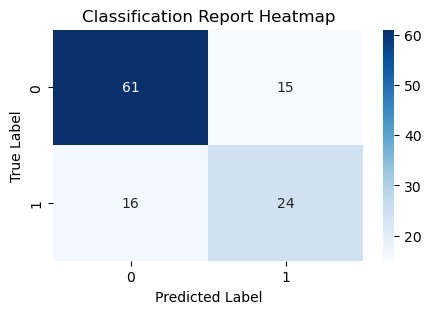

In [28]:
#SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initializing SVM classifier
svm_classifier = SVC(kernel='linear')

# Training the SVM classifier
svm_classifier.fit(X_train, y_train)

# Making predictions on the testing set
y_pred = svm_classifier.predict(X_test)
target_names=[0,1]
# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

Accuracy: 0.8017241379310345
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85        76
           1       0.74      0.65      0.69        40

    accuracy                           0.80       116
   macro avg       0.79      0.77      0.77       116
weighted avg       0.80      0.80      0.80       116



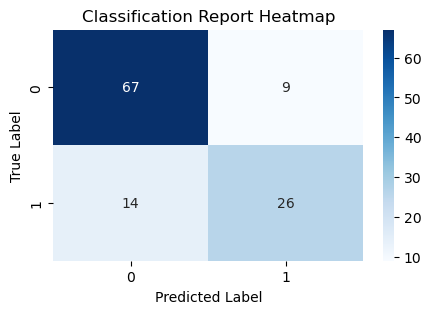

In [29]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=13)

knn_classifier.fit(X_train, y_train)

y_pred = knn_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        76
           1       0.63      0.65      0.64        40

    accuracy                           0.75       116
   macro avg       0.72      0.73      0.72       116
weighted avg       0.75      0.75      0.75       116



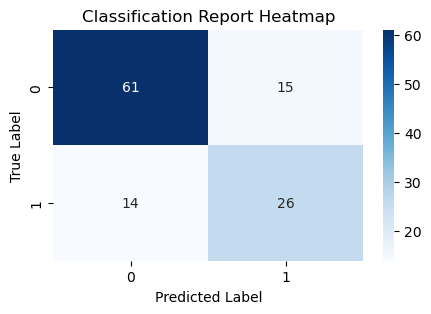

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
plot_confusion_matrix(y_test, y_pred_rf, target_names, title='Classification Report Heatmap', figsize=(5,3))

Epoch 1/50
17/17 [==============================] - 1s 9ms/step - loss: 0.6596 - accuracy: 0.6123 - val_loss: 0.5957 - val_accuracy: 0.6641
Epoch 2/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5616 - accuracy: 0.6929 - val_loss: 0.5363 - val_accuracy: 0.7023
Epoch 3/50
17/17 [==============================] - 0s 2ms/step - loss: 0.5099 - accuracy: 0.7543 - val_loss: 0.5076 - val_accuracy: 0.6947
Epoch 4/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.7639 - val_loss: 0.4933 - val_accuracy: 0.7176
Epoch 5/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4690 - accuracy: 0.7774 - val_loss: 0.4825 - val_accuracy: 0.7252
Epoch 6/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7812 - val_loss: 0.4852 - val_accuracy: 0.7176
Epoch 7/50
17/17 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7908 - val_loss: 0.4761 - val_accuracy: 0.7252
Epoch 8/50
17/17 [==

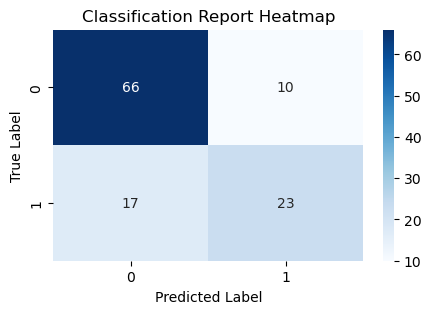

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report

# Define the number of classes
num_classes = 2

# Define the model architecture
dnn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer for classification
])

# Compile the model
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = dnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on test set
loss, accuracy = dnn_model.evaluate(X_test, y_test)
print("DNN Loss:", loss)
print("DNN Accuracy:", accuracy)

# Get probabilities of each class
y_pred_probs = dnn_model.predict(X_test)
# Convert probabilities to class labels
y_pred_dnn = np.argmax(y_pred_probs, axis=1)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_dnn))
plot_confusion_matrix(y_test, y_pred_dnn, target_names, title='Classification Report Heatmap', figsize=(5,3))

# After Preprocessing

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler


In [33]:
selected=["Glucose","SkinThickness","Insulin","BMI","BloodPressure"]

for col in selected:
    df[col]= df[col].apply(lambda x: np.nan if x==0 else x)
    
for col in selected:
    df[col]=df[col].fillna(df.groupby("Outcome")[col].transform("mean"))

In [34]:
num_cols=[col for col in df.columns if (df[col].dtype != "O") & (col != "Outcome") & (df[col].nunique()>10)]
def outlier_thresholds(dataframe, col_name, q1=0.15, q3=0.85):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# with these up and low values , we are gonna look at the variables if there is a outlier or not 
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False
def remove_outliers(dataframe, columns):
    for col in columns:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        # Remove outliers
        dataframe = dataframe[(dataframe[col] >= low_limit) & (dataframe[col] <= up_limit)]
    return dataframe

for col in num_cols:
    print(col, check_outlier(df, col))
df_cleaned = remove_outliers(df, num_cols)
print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_cleaned.shape)

Pregnancies False
Glucose False
BloodPressure True
SkinThickness True
Insulin True
BMI True
DiabetesPedigreeFunction True
Age False
Shape before removing outliers: (768, 9)
Shape after removing outliers: (736, 9)


In [35]:
df=df_cleaned

In [36]:
# Separate features and target
X = df.drop(columns=['Outcome'])
y = df['Outcome']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42,stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Define hyperparameters for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create a Random Forest Classifier model
rf_model = RandomForestClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='recall', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)



Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        73
           1       0.84      0.84      0.84        38

    accuracy                           0.89       111
   macro avg       0.88      0.88      0.88       111
weighted avg       0.89      0.89      0.89       111



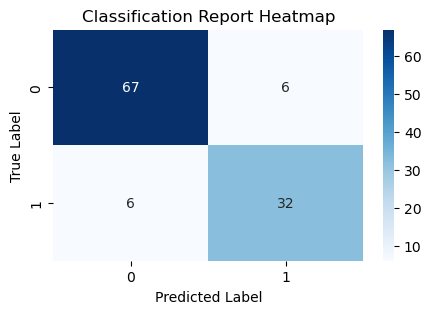

In [38]:
# Train the model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_rf_model.predict(X_test_scaled)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [39]:
y_train.shape

(625,)

In [40]:
y_test.shape

(111,)

In [41]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model is:', accuracy * 100)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy of the model is: 90.990990990991
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        73
           1       0.85      0.89      0.87        38

    accuracy                           0.91       111
   macro avg       0.90      0.91      0.90       111
weighted avg       0.91      0.91      0.91       111



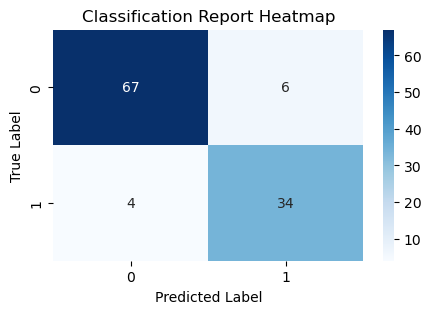

In [42]:
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [43]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn.pipeline import Pipeline

# Define a function to create the model
def create_model(hidden_layer_size=128, dropout_rate=0.2):
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(8,)),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(hidden_layer_size//2, activation='relu'),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create a pipeline with StandardScaler and the model
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model))
])

# Define the parameter grid
param_grid = {
    'clf__hidden_layer_size': [64, 128, 256],
    'clf__dropout_rate': [0.2, 0.3, 0.4],
    'clf__epochs': [50],
    'clf__batch_size': [32]
}

# Define F1 scorer for GridSearchCV
f1_scorer = make_scorer(accuracy_score, average='weighted')

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring=f1_scorer, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best F1 score
print("Best parameters found:", grid_search.best_params_)
print("Best F1 score on validation set:", grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_pred = best_model.predict(X_test)
test_f1 = f1_score(y_test, test_pred, average='weighted')
print("F1 score on test set:", test_f1)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
Epoch 1/50


C:\Users\shaks\AppData\Local\Temp\ipykernel_25012\3172409149.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  ('clf', tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model))


13/13 [==============================] - 0s 966us/step - loss: 0.9109 - accuracy: 0.6490
Epoch 2/50
13/13 [==============================] - 0s 1000us/step - loss: 0.7037 - accuracy: 0.7115
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5811 - accuracy: 0.7596
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4879 - accuracy: 0.8125
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4585 - accuracy: 0.8005
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8558
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4067 - accuracy: 0.8341
Epoch 8/50
13/13 [==============================] - 0s 960us/step - loss: 0.3956 - accuracy: 0.8462
Epoch 9/50
13/13 [==============================] - 0s 949us/step - loss: 0.3706 - accuracy: 0.8582
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.8389
Epoch 11/50
13/13 [==

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 0s 1ms/step - loss: 0.9587 - accuracy: 0.5564
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7627 - accuracy: 0.7002
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6686 - accuracy: 0.7314
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5469 - accuracy: 0.7938
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5322 - accuracy: 0.7962
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4563 - accuracy: 0.8345
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4412 - accuracy: 0.8201
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4317 - accuracy: 0.8249
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8297
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8441
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.9179 - accuracy: 0.5755
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7183 - accuracy: 0.7170
Epoch 3/50
14/14 [==============================] - 0s 995us/step - loss: 0.6188 - accuracy: 0.7242
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5404 - accuracy: 0.7530
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5074 - accuracy: 0.7938
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.8273
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4495 - accuracy: 0.8153
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4468 - accuracy: 0.8225
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8273
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4179 - accuracy: 0.8153
Epoch 11/50
14/14 [=========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 0s 1ms/step - loss: 0.9866 - accuracy: 0.5337
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6395 - accuracy: 0.7861
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4959 - accuracy: 0.8221
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8317
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4051 - accuracy: 0.8269
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8558
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3650 - accuracy: 0.8510
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3597 - accuracy: 0.8558
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3603 - accuracy: 0.8750
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8510
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.7033 - accuracy: 0.7890
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5138 - accuracy: 0.8034
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.8225
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4162 - accuracy: 0.8345
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3760 - accuracy: 0.8489
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8561
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3655 - accuracy: 0.8489
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8513
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8441
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3535 - accuracy: 0.8657
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.9330 - accuracy: 0.5683
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6390 - accuracy: 0.7698
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5270 - accuracy: 0.7842
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4668 - accuracy: 0.8106
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.8297
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4271 - accuracy: 0.8345
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4157 - accuracy: 0.8417
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4073 - accuracy: 0.8321
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3841 - accuracy: 0.8441
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3898 - accuracy: 0.8441
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 1s 2ms/step - loss: 0.7870 - accuracy: 0.6995
Epoch 2/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.8125
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.8413
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3624 - accuracy: 0.8558
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3510 - accuracy: 0.8606
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3296 - accuracy: 0.8630
Epoch 7/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8654
Epoch 8/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3155 - accuracy: 0.8798
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3134 - accuracy: 0.8702
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3005 - accuracy: 0.8894
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 2ms/step - loss: 0.7560 - accuracy: 0.6954
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4314 - accuracy: 0.8297
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3844 - accuracy: 0.8513
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3807 - accuracy: 0.8513
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8609
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8513
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3444 - accuracy: 0.8609
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3450 - accuracy: 0.8633
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3281 - accuracy: 0.8657
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8681
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.8107 - accuracy: 0.6811
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4907 - accuracy: 0.8010
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.8297
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4079 - accuracy: 0.8489
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8489
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3777 - accuracy: 0.8657
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3725 - accuracy: 0.8705
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3719 - accuracy: 0.8585
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8681
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8345
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 0s 1ms/step - loss: 1.1886 - accuracy: 0.3341
Epoch 2/50
13/13 [==============================] - 0s 932us/step - loss: 0.8983 - accuracy: 0.6298
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7124 - accuracy: 0.7428
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6249 - accuracy: 0.7740
Epoch 5/50
13/13 [==============================] - 0s 945us/step - loss: 0.5601 - accuracy: 0.7788
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.7957
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4944 - accuracy: 0.8101
Epoch 8/50
13/13 [==============================] - 0s 968us/step - loss: 0.4886 - accuracy: 0.8101
Epoch 9/50
13/13 [==============================] - 0s 876us/step - loss: 0.5154 - accuracy: 0.8005
Epoch 10/50
13/13 [==============================] - 0s 980us/step - loss: 0.4423 - accuracy: 0.8317
Epoch 11/50
13/13 [=

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 1.0976 - accuracy: 0.3597
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.8807 - accuracy: 0.6882
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7697 - accuracy: 0.7050
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6717 - accuracy: 0.7530
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6024 - accuracy: 0.7890
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5661 - accuracy: 0.7866
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7938
Epoch 8/50
14/14 [==============================] - 0s 984us/step - loss: 0.4618 - accuracy: 0.8106
Epoch 9/50
14/14 [==============================] - 0s 994us/step - loss: 0.4888 - accuracy: 0.8177
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4560 - accuracy: 0.8249
Epoch 11/50
14/14 [=======

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 1.1794 - accuracy: 0.2806
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.9274 - accuracy: 0.5564
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7589 - accuracy: 0.7026
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6794 - accuracy: 0.7434
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6124 - accuracy: 0.7530
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5643 - accuracy: 0.7578
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5278 - accuracy: 0.7818
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5180 - accuracy: 0.7818
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.7746
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4797 - accuracy: 0.7794
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 1s 1ms/step - loss: 0.8671 - accuracy: 0.6394
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5866 - accuracy: 0.7909
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.8005
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4105 - accuracy: 0.8197
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4154 - accuracy: 0.8245
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3790 - accuracy: 0.8341
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3889 - accuracy: 0.8341
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3724 - accuracy: 0.8317
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3482 - accuracy: 0.8582
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3666 - accuracy: 0.8462
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 1.0024 - accuracy: 0.4988
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7242 - accuracy: 0.7554
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5881 - accuracy: 0.7866
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5012 - accuracy: 0.8058
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4510 - accuracy: 0.8369
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4282 - accuracy: 0.8177
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8537
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.8321
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3916 - accuracy: 0.8393
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3955 - accuracy: 0.8345
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.8810 - accuracy: 0.6067
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6191 - accuracy: 0.7290
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5036 - accuracy: 0.7578
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4628 - accuracy: 0.8273
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4595 - accuracy: 0.8010
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.8273
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.8441
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4380 - accuracy: 0.8273
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4040 - accuracy: 0.8417
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4165 - accuracy: 0.8417
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 1s 2ms/step - loss: 0.8014 - accuracy: 0.6683
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4827 - accuracy: 0.7933
Epoch 3/50
13/13 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.8317
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3898 - accuracy: 0.8486
Epoch 5/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8317
Epoch 6/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3543 - accuracy: 0.8606
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3345 - accuracy: 0.8582
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3392 - accuracy: 0.8606
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8774
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3106 - accuracy: 0.8774
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 2ms/step - loss: 0.7624 - accuracy: 0.6787
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4587 - accuracy: 0.8297
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8369
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3865 - accuracy: 0.8561
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3646 - accuracy: 0.8537
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3542 - accuracy: 0.8489
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8705
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8465
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3471 - accuracy: 0.8561
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3320 - accuracy: 0.8561
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 0s 2ms/step - loss: 0.7699 - accuracy: 0.6787
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7746
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4482 - accuracy: 0.7962
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4313 - accuracy: 0.8201
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4116 - accuracy: 0.8297
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4232 - accuracy: 0.8369
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.8513
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.8513
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3908 - accuracy: 0.8537
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8777
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 0s 1ms/step - loss: 1.0912 - accuracy: 0.3774
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.8229 - accuracy: 0.5577
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.7044 - accuracy: 0.6274
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6466 - accuracy: 0.6731
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5743 - accuracy: 0.7332
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7572
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5396 - accuracy: 0.7284
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.5071 - accuracy: 0.7596
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7909
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4651 - accuracy: 0.8077
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.8328 - accuracy: 0.6115
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7229 - accuracy: 0.7266
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6184 - accuracy: 0.7434
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5801 - accuracy: 0.7338
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5436 - accuracy: 0.7722
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5025 - accuracy: 0.7938
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5440 - accuracy: 0.7866
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5107 - accuracy: 0.7674
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4519 - accuracy: 0.8010
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4635 - accuracy: 0.8273
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.8631 - accuracy: 0.5923
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.7222 - accuracy: 0.6787
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6101 - accuracy: 0.7218
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5783 - accuracy: 0.7242
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5419 - accuracy: 0.7290
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5176 - accuracy: 0.7530
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4767 - accuracy: 0.8034
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7842
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7938
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8058
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 1s 1ms/step - loss: 0.8303 - accuracy: 0.5841
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.6035 - accuracy: 0.7500
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4805 - accuracy: 0.8149
Epoch 4/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4395 - accuracy: 0.8293
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4364 - accuracy: 0.8221
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4035 - accuracy: 0.8245
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8125
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3853 - accuracy: 0.8510
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3803 - accuracy: 0.8438
Epoch 10/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8125
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.9296 - accuracy: 0.5659
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6374 - accuracy: 0.7578
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7842
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4734 - accuracy: 0.8153
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4232 - accuracy: 0.8249
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4346 - accuracy: 0.8201
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3890 - accuracy: 0.8513
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4026 - accuracy: 0.8249
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3963 - accuracy: 0.8273
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3974 - accuracy: 0.8297
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 1ms/step - loss: 0.8526 - accuracy: 0.6211
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.6441 - accuracy: 0.7074
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5478 - accuracy: 0.7338
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5007 - accuracy: 0.7962
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4757 - accuracy: 0.8010
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7914
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4636 - accuracy: 0.7986
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4287 - accuracy: 0.8273
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4324 - accuracy: 0.8201
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4424 - accuracy: 0.8273
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

13/13 [==============================] - 0s 1ms/step - loss: 0.7840 - accuracy: 0.6827
Epoch 2/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.8101
Epoch 3/50
13/13 [==============================] - 0s 1ms/step - loss: 0.4201 - accuracy: 0.8365
Epoch 4/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3909 - accuracy: 0.8510
Epoch 5/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8389
Epoch 6/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3489 - accuracy: 0.8438
Epoch 7/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3736 - accuracy: 0.8365
Epoch 8/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3338 - accuracy: 0.8726
Epoch 9/50
13/13 [==============================] - 0s 1ms/step - loss: 0.3423 - accuracy: 0.8534
Epoch 10/50
13/13 [==============================] - 0s 2ms/step - loss: 0.3216 - accuracy: 0.8630
Epoch 11/50
13/13 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 2ms/step - loss: 0.7835 - accuracy: 0.6763
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4954 - accuracy: 0.8010
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8225
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3872 - accuracy: 0.8561
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4071 - accuracy: 0.8369
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8345
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3809 - accuracy: 0.8441
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3811 - accuracy: 0.8513
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3869 - accuracy: 0.8513
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3485 - accuracy: 0.8513
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

14/14 [==============================] - 1s 2ms/step - loss: 0.8234 - accuracy: 0.6379
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5162 - accuracy: 0.7674
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8225
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8201
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8393
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4226 - accuracy: 0.8345
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4014 - accuracy: 0.8417
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.4103 - accuracy: 0.8273
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3874 - accuracy: 0.8513
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3995 - accuracy: 0.8513
Epoch 11/50
14/14 [===========

C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 355, in _score
    return self._sign * self._score_func(y_true, y_pred, **scoring_kwargs)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\shaks\anaconda

20/20 [==============================] - 0s 1ms/step - loss: 1.0370 - accuracy: 0.5200
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7575 - accuracy: 0.6608
Epoch 3/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6125 - accuracy: 0.7472
Epoch 4/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7760
Epoch 5/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4574 - accuracy: 0.8096
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4559 - accuracy: 0.8064
Epoch 7/50
20/20 [==============================] - 0s 977us/step - loss: 0.4491 - accuracy: 0.8128
Epoch 8/50
20/20 [==============================] - 0s 941us/step - loss: 0.4340 - accuracy: 0.8096
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4247 - accuracy: 0.8272
Epoch 10/50
20/20 [==============================] - 0s 1ms/step - loss: 0.4244 - accuracy: 0.8208
Epoch 11/50
20/20 [=======

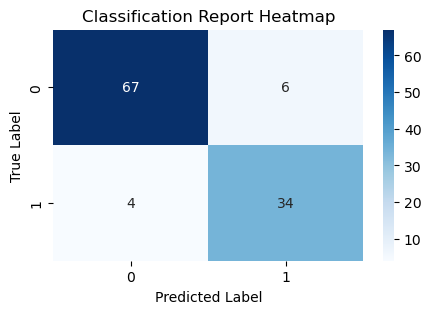

In [44]:
plot_confusion_matrix(y_test, y_pred, target_names, title='Classification Report Heatmap', figsize=(5,3))

In [45]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'clf__batch_size': 32, 'clf__dropout_rate': 0.2, 'clf__epochs': 50, 'clf__hidden_layer_size': 64}


In [46]:
print("Classification Report:")
print(classification_report(y_test, test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        73
           1       0.83      0.89      0.86        38

    accuracy                           0.90       111
   macro avg       0.89      0.90      0.89       111
weighted avg       0.90      0.90      0.90       111



In [47]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


def create_dnn_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

dnn_model = create_dnn_model()
dnn_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


rf_pred_train = rf_model.predict(X_train)
dnn_pred_train = dnn_model.predict(X_train)

rf_pred_test = rf_model.predict(X_test)
dnn_pred_test = dnn_model.predict(X_test)


X_train_stacked = np.column_stack((rf_pred_train, dnn_pred_train))
X_test_stacked = np.column_stack((rf_pred_test, dnn_pred_test))


scorer = make_scorer(f1_score)


def create_meta_learner(hidden_units=32, dropout_rate=0.2):
    model = Sequential([
        Dense(hidden_units, activation='relu', input_shape=(2,)),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the meta-learner model
meta_learner = KerasClassifier(build_fn=create_meta_learner, verbose=0)

# Define the parameter grid for the meta-learner model
param_grid = {
    'hidden_units': [16, 32, 64],
    'dropout_rate': [0.1, 0.2, 0.3],
    'epochs': [5, 10, 15],
    'batch_size': [16, 32, 64]
}

# Perform grid search
grid_search = GridSearchCV(estimator=meta_learner, param_grid=param_grid, scoring=scorer, cv=3)
grid_result = grid_search.fit(X_train_stacked, y_train)

# Print the best parameters and the corresponding F1 score
print("Best Parameters:", grid_result.best_params_)
print("Best F1 Score:", grid_result.best_score_)


4/4 [==============================] - 0s 1000us/step


C:\Users\shaks\AppData\Local\Temp\ipykernel_25012\248988212.py:56: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  meta_learner = KerasClassifier(build_fn=create_meta_learner, verbose=0)


7/7 [==============================] - 0s 826us/step


7/7 [==============================] - 0s 996us/step
Best Parameters: {'batch_size': 16, 'dropout_rate': 0.1, 'epochs': 5, 'hidden_units': 64}
Best F1 Score: 1.0


In [48]:
best_meta_learner = grid_search.best_estimator_

ensemble_pred_test = best_meta_learner.predict(X_test_stacked)

# Print confusion matrix
conf_matrix = classification_report(y_test, ensemble_pred_test)
print("Confusion Matrix:")
print(conf_matrix)

4/4 [==============================] - 0s 1ms/step
Confusion Matrix:
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        73
           1       0.82      0.87      0.85        38

    accuracy                           0.89       111
   macro avg       0.88      0.89      0.88       111
weighted avg       0.89      0.89      0.89       111



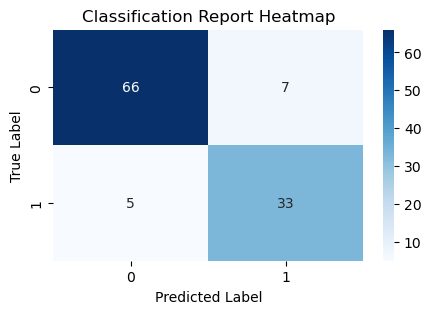

In [49]:
plot_confusion_matrix(y_test, ensemble_pred_test, target_names, title='Classification Report Heatmap', figsize=(5,3))